## Section 1, Part A

In [31]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib.table import table
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import jinja2
import re
import tabulate
from sympy import true

tweet_data = pd.read_csv("training_data.csv")
print(tweet_data.head())
print (tweet_data.columns)
#print(np.mean(tweet_data['retweet_count']))

   favorite_count                                          full_text  \
0               8  b'WATCH my speech on the @SenateFloor to learn...   
1               2  b'Boehner delays leadership races. Only speake...   
2               5  b"I'll be sharing #scarynumbers about #governm...   
3              34  b"#OTD in '64, LBJ took important step towards...   
4              23  b'My bipartisan bill is a step toward protecti...   

                          hashtags  retweet_count  year  dim1_nominate  \
0                PatientFreedomAct              3  2017       0.243962   
1              rossformajoritywhip              3  2015       0.561728   
2  scarynumbers governmentspending              4  2014       0.513246   
3                              OTD             14  2017      -0.241932   
4                             VA07              7  2020      -0.225722   

   dim2_nominate  
0       0.170366  
1       0.089540  
2      -0.224541  
3       0.097843  
4       0.329999  
Index(['

(a) Create a table that contains information on minimum, average, median, and maximum for the
following: tweet length (#characters and #words) (text column), hashtag length (#characters and
#words) (hashtags column) (Add your table to the report.) (4 points) (2 points for graduate
students)

In [32]:
# The one without links and hashtag will be written in partB
# remove "b' or b" and ' or " at the end

df = pd.read_csv("training_data.csv")
df["full_text_decoded"] = df["full_text"].astype(str).str.replace(r'^b["\']', '', regex=True).str.replace(r'["\']$', '', regex=True)
#counting full text words and characters
df["full_text_decoded_char_length"] = df["full_text_decoded"].str.len()
df["full_text_decoded_word_length"] = df["full_text_decoded"].str.split().str.len()
#counting hashtags words and characters
df["hashtags_char_length"] = df["hashtags"].astype(str).str.len()
df["hashtags_word_length"] = df["hashtags"].astype(str).str.split().str.len()
#summary table
summary_table = df[["full_text_decoded_char_length", "full_text_decoded_word_length","hashtags_char_length","hashtags_word_length"]].agg(["min","max","mean","median"])
#rename col name
summary_table = summary_table.rename(columns={
    "full_text_decoded_char_length": "Tweets Character Length",
    "full_text_decoded_word_length": "Tweets Word Length",
    "hashtags_char_length": "Hashtags Character Length",
    "hashtags_word_length": "Hashtags Word Length"
})
#print summary table
summary_table = summary_table.transpose()
summary_table

,min,max,mean,median
Tweets Character Length,4.0,2434.0,180.176139,151.0
Tweets Word Length,1.0,61.0,24.885511,21.0
Hashtags Character Length,1.0,184.0,14.536123,12.0
Hashtags Word Length,1.0,17.0,1.491980,1.0


b) Find the top ten most commonly used hashtags (hashtags column). Then, create a bar chart which show the count values of these ten most commonly used hashtags. Do you observe any patterns? What are the meanings / interpretations of the hashtags you have identified? Write your findings in the report. (Add the bar chart to the report.) (4 points) (2 points for graduate students)

[('COVID19', 4870), ('SOTU', 2901), ('Obamacare', 2182), ('coronavirus', 1524), ('utpol', 1387), ('GOPTaxScam', 1349), ('TaxReform', 1248), ('ProtectOurCare', 1237), ('IA03', 1214), ('ForThePeople', 1085)]


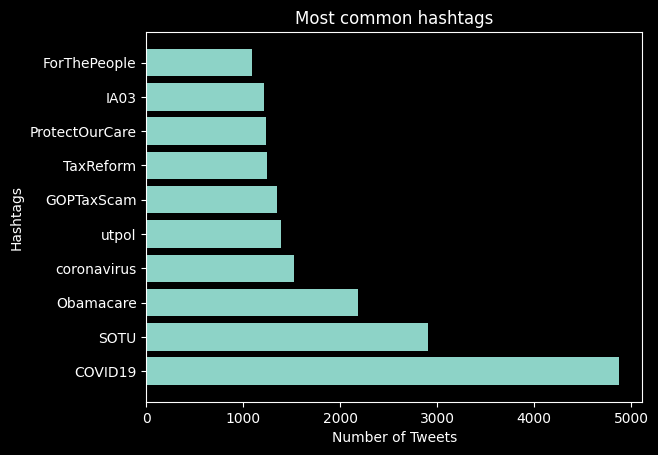

In [33]:
a = Counter(tweet_data['hashtags']).most_common(10)
hashtags = list()
hastagnums = list()
print(a)
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

- Big events like the State of the Union, hot-button issues like Obamacare or the pandemic attract the most attention

c) To answer this question, first please read the description above DW-NOMINATE scores provided
at the beginning of this assignment document. Then, please divide your training dataset into four
subsets by focusing on the following ideological dimensions:

a. Group 1: Dim 1 (0 to 1), Dim 2 (0 to 1)

b. Group 2: Dim 1 (0 to 1), Dim 2 (0 to -1)

c. Group 3: Dim 1 (0 to -1), Dim 2 (0 to 1)

d. Group 4: Dim 1 (0 to -1), Dim 2) (0 to -1)

In [34]:
group1 = tweet_data[(tweet_data['dim1_nominate'] > 0) & (tweet_data['dim2_nominate'] > 0)]
group2 = tweet_data[(tweet_data['dim1_nominate'] > 0) & (tweet_data['dim2_nominate'] <= 0)]
group3 = tweet_data[(tweet_data['dim1_nominate'] <= 0) & (tweet_data['dim2_nominate'] > 0)]
group4 = tweet_data[(tweet_data['dim1_nominate'] <= 0) & (tweet_data['dim2_nominate'] <= 0)]



[('Obamacare', 1440), ('SOTU', 1200), ('COVID19', 1126), ('TaxReform', 922), ('MS01', 888), ('utpol', 828), ('taxreform', 698), ('USMCA', 620), ('AR3', 517), ('tcot', 494)]


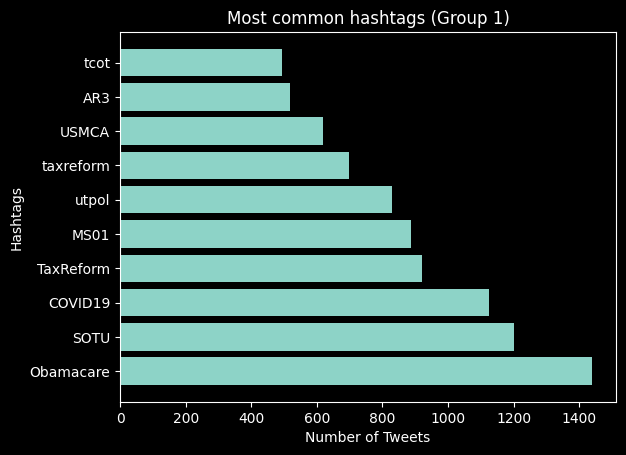

In [35]:
#Group 1 Bargraph: Dim 1 (0 to 1), Dim 2 (0 to 1)
a = Counter(group1['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 1)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('IA03', 1078), ('SouthJersey', 754), ('COVID19', 665), ('Obamacare', 624), ('NY22', 601), ('SOTU', 577), ('VA05', 446), ('NY24', 392), ('coronavirus', 353), ('TaxReform', 277)]


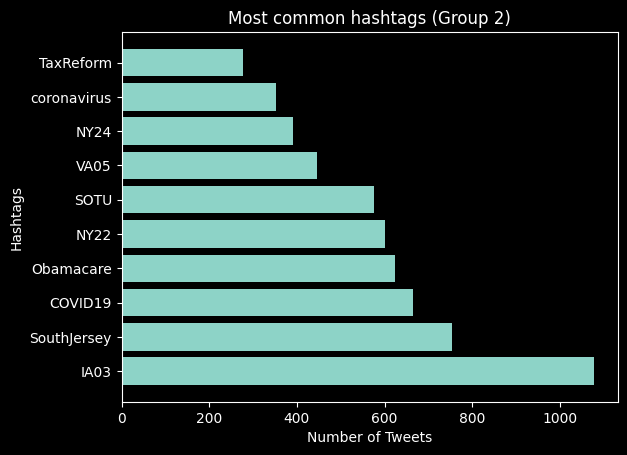

In [36]:
#Group 2 Bargraph: Dim 1 (0 to 1), Dim 2 (0 to -1)

a = Counter(group2['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 2)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('COVID19', 1531), ('VA07', 603), ('mtpol', 544), ('ProtectOurCare', 417), ('ForThePeople', 386), ('SOTU', 357), ('coronavirus', 349), ('GetCovered', 348), ('utpol', 344), ('IA01', 322)]


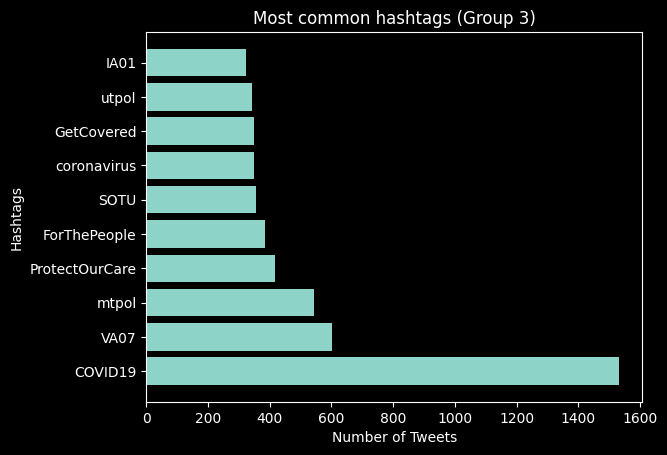

In [37]:
#Group 3 Bargraph: Dim 1 (0 to -1), Dim 2 (0 to 1)

a = Counter(group3['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 3)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('COVID19', 1548), ('GOPTaxScam', 1139), ('ProtectOurCare', 820), ('SOTU', 767), ('ForThePeople', 698), ('Trumpcare', 684), ('GetCovered', 634), ('ACA', 611), ('ActOnClimate', 586), ('NetNeutrality', 584)]


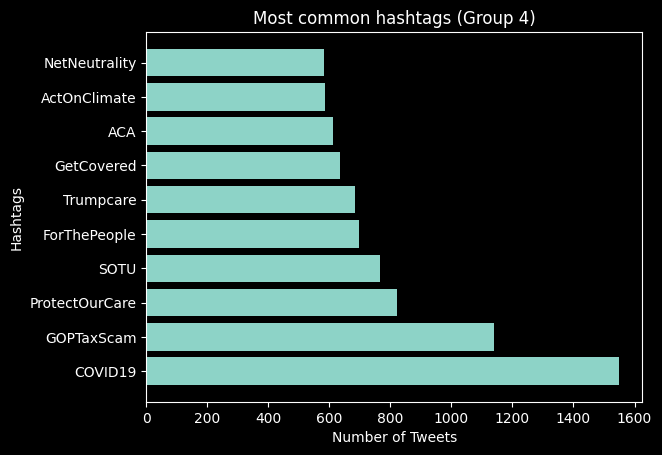

In [38]:
#Group 4 Bargraph: Dim 1 (0 to -1), Dim 2 (0 to -1)

a = Counter(group4['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 4)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

d) Divide the training dataset into two along the 1st dimension. All observations that have a value
bigger than zero (in the 1st dimension) should be designated as ‘conservative’, all other
observations should be designed as ‘liberal’. Create a ridge plot that shows the changes in these
values (1st dimension) through the years for two different ideological groups. Color the
conservative group as red, color the liberal group as blue.

0
13
1
13
2
13
3
13
4
13
5
13
6
13
7
13
8
13
9
13
10
13
11
13
12
13


/tmp/ipykernel_19267/2845115544.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


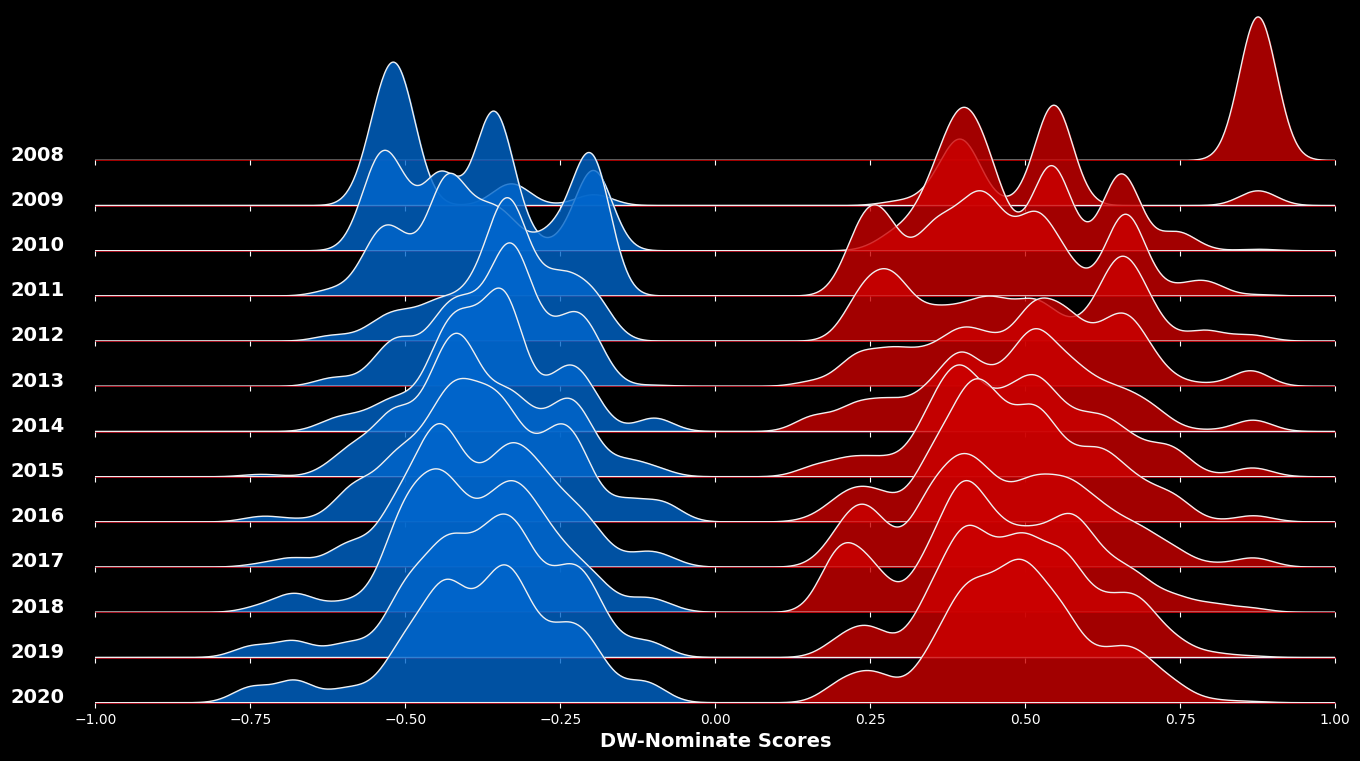

In [39]:
# ridge plot code modified from: https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/

# essentially, we plot twice.
conservative = tweet_data[tweet_data['dim1_nominate'] > 0]
liberal = tweet_data[tweet_data['dim1_nominate'] <= 0]


years = sorted(tweet_data['year'].unique())

gs = grid_spec.GridSpec(len(years),1)
fig = plt.figure(figsize=(16,9))

i = 0

color_lib = '#0066cc'
color_con = '#cc0000'

ax_objs = []
for y in years:
    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    #LIBERAL
    x_lib = np.array(liberal[liberal.year == y].dim1_nominate)
    if(len(x_lib > 1)):
        x_d_lib = np.linspace(-1,1, 1000)
        kde_lib = KernelDensity(bandwidth=0.03, kernel='gaussian')
        kde_lib.fit(x_lib[:, None])
        logprob_lib = kde_lib.score_samples(x_d_con[:, None])
        # plotting the distribution
        ax_objs[-1].plot(x_d_lib, np.exp(logprob_lib),color="#f0f0f0",lw=1)
        ax_objs[-1].fill_between(x_d_lib, np.exp(logprob_lib), alpha=0.8,color=color_lib)


    #CONSERVATIVE
    x_con = np.array(conservative[conservative.year == y].dim1_nominate)
    if(len(x_con > 1)):
        x_d_con = np.linspace(-1,1, 1000)
        kde_con = KernelDensity(bandwidth=0.03, kernel='gaussian')
        kde_con.fit(x_con[:, None])
        logprob_con = kde_con.score_samples(x_d_con[:, None])
        # plotting the distribution
        ax_objs[-1].plot(x_d_con, np.exp(logprob_con),color="#f0f0f0",lw=1)
        ax_objs[-1].fill_between(x_d_con, np.exp(logprob_con), alpha=0.8,color=color_con)



    # setting uniform x and y lims
    ax_objs[-1].set_xlim(-1,1)
    ax_objs[-1].set_ylim(0,None)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticks([])

    if i == len(years)-1:
        ax_objs[-1].set_xlabel("DW-Nominate Scores", fontsize=14,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    print(i)
    print(len(years))
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)
    y = str(y)
    adj_year = y.replace(" ","\n")
    ax_objs[-1].text(-1.05,0,adj_year,fontweight="bold",fontsize=14,ha="right")

    i += 1



gs.update(hspace=-0.7)

fig.text(0.07,0.85,"",fontsize=20)

plt.tight_layout()
plt.show()


#Finally, find the top-10 tweets that are ideologically most different from each other by calculating
the Euclidean distances for the following:

a. Top-10 most distant tweets along both dimensions

b. Top-10 most distant tweets along the 1st dimension

c. Top-10 most distant tweets along the 2nd dimension

Please report your findings in the form of tables [tweet pairs that are ideologically distant and the
distance value]. Do you observe any patterns? Please explain. Write your findings in the report.
(Add the tables to the report.)

In [40]:
# part a, I suppose - note that this was done after b and c.

# Taking a Convex Hull approach - https://www.geeksforgeeks.org/dsa/convex-hull-algorithm/

# as, well, I really really don't want to

from scipy.spatial import ConvexHull

points = tweet_data.loc[0:,'dim1_nominate':'dim2_nominate'].values
index = tweet_data.index.values
hull = ConvexHull(points)

pairs = []
#print(hull.vertices)
hull_points = points[hull.vertices]
hull_index = index[hull.vertices]
n = len(hull_points)

#essentially we go along the most distant parts of the hull to find which 'most distant' points are the most distant from each other.
#Due to the different approach I took with (a) (Convex Hull vs. simply ranking and taking the top 10 and bottom 10) this might produce more interesting results than with b/c.
for i in range(n):
    for j in range(i+1, n):
        d = np.linalg.norm(hull_points[i] - hull_points[j])
        pairs.append((d, hull_index[i], hull_index[j]))

pairs.sort(reverse=True, key = lambda pairs: pairs[0])
top10 = pairs[:10]
table = pd.DataFrame()

for pair in top10:
    #print(pair[0])
    tweet_a = tweet_data.iloc[[pair[1]]]['full_text'].values
    tweet_b = tweet_data.iloc[[pair[2]]]['full_text'].values

    new_row = pd.DataFrame(
    {
    'Tweet A':tweet_a,
    'Tweet B':tweet_b,
    'Distance':pair[0],
    }
    ).reset_index(drop=True)
    table = pd.concat((table, new_row), axis = 0, ).reset_index(drop=True)

print(table.to_markdown())


|    | Tweet A                                                                                                                                                                                                                                                    | Tweet B                                                                                                                                                                                                                                                                                                                                   |   Distance |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------

|    | Tweet A                                                                                                                                                                                                                                                    | Tweet B                                                                                                                                                                                                                                                                                                                                   |   Distance |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------:|
|  0 | b'In the wake of #ebola, continued economic progress is key for #Liberia. Watch live as I speak to @CGDev at 9:30am ET https://t.co/sXDuRhMN6O'                                                                                                            | b"This weekly roundup: I voted to pass Con. Castro\xe2\x80\x99s resolution 2 block Trump's #FakeEmergency declaration &amp; the 1st major gun safety legislation in over 25 years. My colleagues and I on @HouseJudiciary also investigated the admin\xe2\x80\x99s harmful separation policy at the border.#TX29 https://t.co/xUTwAfVG1i" |    1.9276  |
|  1 | b'#FF Senators who signed #DefundObamaCare letter @ChuckGrassley @sentedcruz http://t.co/rfnd6xd75Z'                                                                                                                                                       | b"This weekly roundup: I voted to pass Con. Castro\xe2\x80\x99s resolution 2 block Trump's #FakeEmergency declaration &amp; the 1st major gun safety legislation in over 25 years. My colleagues and I on @HouseJudiciary also investigated the admin\xe2\x80\x99s harmful separation policy at the border.#TX29 https://t.co/xUTwAfVG1i" |    1.87624 |
|  2 | b"RT @RepDianaDeGette: Today, I joined with @JustinAmash and @RepPressley to officially introduce our bill to #EndQualifiedImmunity.\n\nIt's pa\xe2\x80\xa6"                                                                                               | b'We must ensure hospitals and health care professionals have the necessary resources to respond to #COVID19. I led an effort with 56 colleagues to urge the President to use authority under the Defense Production Act to ensure we have medical supplies to meet the extreme demand. https://t.co/n9erdesnpd'                          |    1.87054 |
|  3 | b'In the wake of #ebola, continued economic progress is key for #Liberia. Watch live as I speak to @CGDev at 9:30am ET https://t.co/sXDuRhMN6O'                                                                                                            | b'We must ensure hospitals and health care professionals have the necessary resources to respond to #COVID19. I led an effort with 56 colleagues to urge the President to use authority under the Defense Production Act to ensure we have medical supplies to meet the extreme demand. https://t.co/n9erdesnpd'                          |    1.85269 |
|  4 | b'The #ATeam is out at stations throughout the district protesting these #UnfairHikes. We are organizing and mobilizing to develop solutions and create an affordable, inclusive, sustainable public transit system. #mapoli #MA7 https://t.co/GFOkZaW4CF' | b'Spent time this morning at Crossroads Diner, and made a quick stop by Wolf\xe2\x80\x99s Chocolate in Attica, owned by State Rep. Sharon Negele. Great day in #IN04! https://t.co/ClIDZz7NiA'                                                                                                                                            |    1.82454 |
|  5 | b"RT @RepDianaDeGette: Today, I joined with @JustinAmash and @RepPressley to officially introduce our bill to #EndQualifiedImmunity.\n\nIt's pa\xe2\x80\xa6"                                                                                               | b"This weekly roundup: I voted to pass Con. Castro\xe2\x80\x99s resolution 2 block Trump's #FakeEmergency declaration &amp; the 1st major gun safety legislation in over 25 years. My colleagues and I on @HouseJudiciary also investigated the admin\xe2\x80\x99s harmful separation policy at the border.#TX29 https://t.co/xUTwAfVG1i" |    1.8242  |
|  6 | b'The #ATeam is out at stations throughout the district protesting these #UnfairHikes. We are organizing and mobilizing to develop solutions and create an affordable, inclusive, sustainable public transit system. #mapoli #MA7 https://t.co/GFOkZaW4CF' | b'#NDAA is a good bill that does right by our troops and contains important provisions for Maxwell AFB &amp; Fort Rucker... http://t.co/LTjgu9VvKe'                                                                                                                                                                                       |    1.80163 |
|  7 | b'#FF Senators who signed #DefundObamaCare letter @ChuckGrassley @sentedcruz http://t.co/rfnd6xd75Z'                                                                                                                                                       | b'We must ensure hospitals and health care professionals have the necessary resources to respond to #COVID19. I led an effort with 56 colleagues to urge the President to use authority under the Defense Production Act to ensure we have medical supplies to meet the extreme demand. https://t.co/n9erdesnpd'                          |    1.79133 |
|  8 | b'The #ATeam is out at stations throughout the district protesting these #UnfairHikes. We are organizing and mobilizing to develop solutions and create an affordable, inclusive, sustainable public transit system. #mapoli #MA7 https://t.co/GFOkZaW4CF' | b'We must ensure hospitals and health care professionals have the necessary resources to respond to #COVID19. I led an effort with 56 colleagues to urge the President to use authority under the Defense Production Act to ensure we have medical supplies to meet the extreme demand. https://t.co/n9erdesnpd'                          |    1.71286 |
|  9 | b'Proud to defend #2ndAmendment by introducing the Respecting States\xe2\x80\x99 Rights &amp; Concealed Carry Reciprocity Act of 2013. http://t.co/3bZ48QOU'                                                                                               | b"This weekly roundup: I voted to pass Con. Castro\xe2\x80\x99s resolution 2 block Trump's #FakeEmergency declaration &amp; the 1st major gun safety legislation in over 25 years. My colleagues and I on @HouseJudiciary also investigated the admin\xe2\x80\x99s harmful separation policy at the border.#TX29 https://t.co/xUTwAfVG1i" |    1.67441 |

In [41]:
# Handling part b and c first, since it's actually easier that way:

#B - most distant along 1st dim.
sorted_dim1 = tweet_data.sort_values('dim1_nominate')

head = sorted_dim1.head(10)
tail = sorted_dim1.tail(10)
head = head.sort_values('dim1_nominate', ascending=True)
tail = tail.sort_values('dim1_nominate', ascending=False)
newcol = []
for col in tail.columns:
    newcol.append(col + "_1")
tail.columns = newcol


head['index'] = range(0,10)
tail['index'] = range(0,10)
head['full_text'] = head['full_text'].str.replace('|', '')
tail['full_text_1'] = tail['full_text_1'].str.replace('|', '')

#print(head['dim1_nominate'])
#print(tail['dim1_nominate'])
#print(head.columns)
table = pd.merge(head, tail)
table.drop(['hashtags', 'favorite_count', 'hashtags_1', 'favorite_count_1', 'dim2_nominate', 'dim2_nominate_1', 'retweet_count', 'retweet_count_1', 'index', 'year', 'year_1'], axis=1, inplace=True)

table['distance'] = abs(table['dim1_nominate']) + abs(table['dim1_nominate_1'])
table.style.highlight_max(axis=1)

print(table.to_markdown())





|    | full_text                                                                                                                                                                                                                                                                                                                                 |   dim1_nominate | full_text_1                                                                                                                                     |   dim1_nominate_1 |   distance |
|---:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------:|:-----------------------------------------------------------------------------------------------------------

|    | full_text                                                                                                                                                                                                                                                                                                                                 |   dim1_nominate | full_text_1                                                                                                                                     |   dim1_nominate_1 |   distance |
|---:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------:|:------------------------------------------------------------------------------------------------------------------------------------------------|------------------:|-----------:|
|  0 | b'"Since 2014, the EXIM Bank has provided over $450 million worth of export support value in Texas\xe2\x80\x99s 29th Congressional District... We know the EXIM Bank\xe2\x80\x99s programs work and in an increasingly competitive environment, we should not abandon them." #SupportSmallBusiness https://t.co/O8DhdzugHv'               |        -0.75099 | b"Got @dougducey 's back in #LakeHavasuCity with @SenJohnMcCain and @RepGosar http://t.co/5spgxeSdo6"                                           |          0.875556 |    1.62655 |
|  1 | b'Our Community groups that work to lift up families, make us stronger. Thank you for visiting @AVANCEHouston #headstart https://t.co/6IOMrDSfk2'                                                                                                                                                                                         |        -0.75099 | b'#SSOT list should mean something &amp; w/ #Cuba\xe2\x80\x99s removal, today it means a little more. Good for US &amp; the Cuban people'       |          0.875556 |    1.62655 |
|  2 | b'Earlier today at the Neighborhood Safety &amp; Improvement Meeting at the @houstonpolice Freeway Eastfront.\n\nI\xe2\x80\x99m committed to making sure we continue to build a strong relationship between law enforcement and the communities they\xe2\x80\x99ve sworn to protect.\n#NationalNightOut https://t.co/wdLligZTUJ'          |        -0.75099 | b'Senator Reid: "We get nowhere with doing amendments." I respectfully believe my constituents disagree. #unbelievable'                         |          0.875556 |    1.62655 |
|  3 | b"The truth is that hate crimes are on the rise, particularly against the Latino community, because of the Trump administration's hateful rhetoric.\n\nWe need leaders who will stop the hate, not create it. \n#EndHate @HouseJudiciary @HispanicCaucus \n\nhttps://t.co/ebmv7ODFvk"                                                     |        -0.75099 | b'Holding presser w/ @MartinHeinrich at 4:45pm ET to introduce  #DomesticViolenceLoophole Closure Act.  Watch live https://t.co/nM7wRN6bzR'     |          0.875556 |    1.62655 |
|  4 | b"This weekly roundup: I voted to pass Con. Castro\xe2\x80\x99s resolution 2 block Trump's #FakeEmergency declaration &amp; the 1st major gun safety legislation in over 25 years. My colleagues and I on @HouseJudiciary also investigated the admin\xe2\x80\x99s harmful separation policy at the border.#TX29 https://t.co/xUTwAfVG1i" |        -0.75099 | b'Received briefing today in Yarnell from Incident Management Team. #yarnellfire is 90% contained. http://t.co/ljsi7WA2gI'                      |          0.875556 |    1.62655 |
|  5 | b'Parents - I want to hear directly from you. Do you feel safe sending your children back to school in the coming weeks with the current #COVID19 crisis?'                                                                                                                                                                                |        -0.75099 | b'.@StephenAtHome eyeballing my #Senate desk rug with that "Nic Cage at the @USNatArchives" look https://t.co/DsBlqrwUT3'                       |          0.875556 |    1.62655 |
|  6 | b'Good riddance.\n\n#DissolveTheNRA #AbolishNRA \nhttps://t.co/bo4yJhreid'                                                                                                                                                                                                                                                                |        -0.75099 | b'Tune into @kjzzphoenix at 9:15am to learn more about my #nafta4az initiative &amp; then share your story at https://t.co/LklsMlmL8b'          |          0.875556 |    1.62655 |
|  7 | b'.@HouseDemocrats\xe2\x80\x99 $8.3 billion emergency response package delivers the resources needed to address this public health emergency &amp; protect the American people. #COVID19 https://t.co/uW8kuYxEnG'                                                                                                                         |        -0.75099 | b'Headed to the Senate Floor to talk about the economic freedom / human rights agenda for #Cuba'                                                |          0.875556 |    1.62655 |
|  8 | b'.@HouseDemocrats are working hard #ForThePeople to deliver on our promises to expand access to affordable health care and #LowerDrugCosts for Americans who are making decisions between their own health and making ends meet. /1 https://t.co/KrdM2NgpV8'                                                                             |        -0.75099 | b'Partnerships like Future Forest are critical to reach the pace of restoration #AZ needs for wildfire risk reduction. https://t.co/0KuIgxvWpW' |          0.875556 |    1.62655 |
|  9 | b'Last night, I joined @TheRevAl to talk about the #ImpeachmentHearings.\n\nI made it clear that it seems like the Framers had a crystal ball when crafting the Constitution. They feared a President like Donald Trump who would place his interests above the interests of the country. https://t.co/SmTq09gTvu'                        |        -0.75099 | b'Oh, yeah! Snowflake High takes state!  Congrats to nephew #TravisFlake http://t.co/diFx0Gf0Ik'                                                |          0.875556 |    1.62655 |

In [42]:
#C - most distant along 2nd dim.

sorted_dim2 = tweet_data.sort_values('dim2_nominate')

head = sorted_dim2.head(10)
tail = sorted_dim2.tail(10)
head = head.sort_values('dim2_nominate', ascending=True)
tail = tail.sort_values('dim2_nominate', ascending=False)
newcol = []
for col in tail.columns:
    newcol.append(col + "_1")
tail.columns = newcol

head['index'] = range(0,10)
tail['index'] = range(0,10)
#print(head['dim1_nominate'])
#print(tail['dim1_nominate'])
#print(head.columns)
head['full_text'] = head['full_text'].str.replace('|', '')
tail['full_text_1'] = tail['full_text_1'].str.replace('|', '')

table = pd.merge(head, tail)
table.drop(['hashtags', 'favorite_count', 'hashtags_1', 'favorite_count_1', 'dim1_nominate', 'dim1_nominate_1', 'retweet_count', 'retweet_count_1', 'index', 'year', 'year_1'], axis=1, inplace=True)
table['distance'] = abs(table['dim2_nominate']) + abs(table['dim2_nominate_1'])
table.style.highlight_max(axis=1)

print(table.to_markdown())

|    | full_text                                                                                                                                                                                                                                                                                                                                                                                         |   dim2_nominate | full_text_1                                                                                                                                                                                                                                                                                                       |   dim2_nominate_1 |   distance |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

|    | full_text                                                                                                                                                                                                                                                                                                                                                                                         |   dim2_nominate | full_text_1                                                                                                                                                                                                                                                                                                       |   dim2_nominate_1 |   distance |
|---:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------:|-----------:|
|  0 | b'Transit justice is a racial justice issue, &amp; in this moment of reckoning, it\xe2\x80\x99s time we act like it. I introduced the #FreedomToMove Act with @SenMarkey to improve community connectivity and affirm the right to accessible &amp; reliable transportation for all. https://t.co/hbZoeDfGzp'                                                                                     |       -0.982897 | b'Are you a high school student with a passion for science, tech, engineering or math? Apply to my STEM Scholars program which aims to connect students with virtual learning experiences and learn more about STEM career opportunities at businesses in #TX32! https://t.co/uScso2yBhz https://t.co/LeYnvZ8ZV5' |          0.726593 |    1.70949 |
|  1 | b'Today is #CensusDay, an opportunity to recognize the importance of a full and fair count of our communities in the #2020census. #MA7 has historically been undercounted in the census, but together, we have the power to change that. https://t.co/NlenbF9D3D'                                                                                                                                 |       -0.982897 | b'I am live now at my #VeteransDay Town Hall in Dallas. Watch as we hear from North Texas veterans and I give an update on my work in Congress as a member of the Veterans\xe2\x80\x99 Affairs Committee: https://t.co/s7TyVlbbvH #TX32'                                                                          |          0.726593 |    1.70949 |
|  2 | b'Our nation\xe2\x80\x99s greatest wealth is the health of our people. We must continue to #StayHome to save lives, but I\xe2\x80\x99m fighting to get Congress to take meaningful action to mitigate the hurt this crisis is causing for so many in #MA7 and across the country. https://t.co/qoBjJ1nIVx'                                                                                        |       -0.982897 | b'Starting first and foremost with my wife Aly, and my own mom, I want to wish all of the hardworking and dedicated moms across North Texas a very happy #MothersDay! https://t.co/UzSei5DIMy'                                                                                                                    |          0.726593 |    1.70949 |
|  3 | b'In #Massachusetts, the pill is the most common form of birth control, but 47% of pregnancies in the state were unplanned. Every person, regardless of income, sexual orientation or gender identity, deserves equitable access to comprehensive reproductive healthcare. #FreeThePill'                                                                                                          |       -0.982897 | b'Need help with a federal agency? My office is here to help North Texans cut through red tape. Last year I helped Barbara get the tax refund she was owed. Visit my website to learn how we have helped constituents in #TX32 and how we can help you: https://t.co/E5PWKWfWrk https://t.co/k5MVVBpDPC'          |          0.726593 |    1.70949 |
|  4 | b'One of #HeatherHeyer\xe2\x80\x99s last facebook posts read \xe2\x80\x9cIf you\xe2\x80\x99re not outraged, you\xe2\x80\x99re not paying attention.\xe2\x80\x9d \n\nI\xe2\x80\x99m outraged that 2 years after Heather\xe2\x80\x99s murder in #Charlottesville, our nation has yet to address the white supremacist terrorism that killed her &amp; far too many others. https://t.co/e1A9kkHrM4' |       -0.982897 | b'Take the time today to thank a teacher! My mom was a Dallas public school teacher and teachers in our public schools were so important to helping me succeed. Let\xe2\x80\x99s all commit to ensuring educators across North Texas get the support they need. #TeacherAppreciationDay. https://t.co/T0Ia0prNO9' |          0.726593 |    1.70949 |
|  5 | b'Rhetoric from global leaders drives this type of vitriol and we must all play a role in the healing, reconciliation and justice that needs to follow. To my Muslim brothers &amp; sisters in the #MA7 &amp; around the world you are seen and you are loved.'                                                                                                                                   |       -0.982897 | b'Listening to North Texans, answering questions and helping you navigate this difficult time is my top priority. If you missed my telephone town hall on #COVID19 last week, take a listen and if you need help w/ federal programs call my office: 972-972-7949. https://t.co/0Rh42wOspD'                       |          0.726593 |    1.70949 |
|  6 | b'I remain committed to reining in the hateful abuses of @ICEgov &amp; @CBP and to increasing oversight of this administration\xe2\x80\x99s deportation agenda. Proud to have submitted written testimony affirming the humanity of all immigrants in #MA7 &amp; across our Commonwealth #SafeCommunitiesAct https://t.co/Mv9tTGzADV'                                                             |       -0.982897 | b'Over the past 25 years, the Violence Against Women Act has been vital in the effort to reduce domestic violence and has been a lifeline for survivors. I implore the Senate to reauthorize this bipartisan bill so we can continue that work and make our communities safer. #VAWA25'                           |          0.726593 |    1.70949 |
|  7 | b"RT @CityOfBoston: #Boston has two birthdays (thanks to a switch from the Julian to the Gregorian calendar) &amp; we're happy to celebrate both.\xe2\x80\xa6"                                                                                                                                                                                                                                    |       -0.982897 | b'This is a time when government agencies at every level must work together, but we need clear, concise planning and preparation from this Administration. I will continue to work in Congress to ensure we have the resources we need to combat and contain the spread of #coronavirus.'                         |          0.726593 |    1.70949 |
|  8 | b'I\xe2\x80\x99m immensely grateful for @WORKInc\xe2\x80\x99s and @AbilityOne75\xe2\x80\x99s commitment to equity and activism, and am honored to join in partnership to dismantle #ableism and break down barriers to a dignified and meaningful life. https://t.co/cOjleXS6fx'                                                                                                                  |       -0.982897 | b'Completing your #2020Census can help your city get the funds it needs to provide community services. Fill yours out in minutes at https://t.co/Q3b5cpnkrA\nhttps://t.co/HV3JGIsZpT'                                                                                                                             |          0.726593 |    1.70949 |
|  9 | b'My team and I are hard at work for the people of #MA7 in Washington and at home in our district. Sign up for our newsletter to stay up to date on everything we\xe2\x80\x99re doing in pursuit of equity and justice for all. https://t.co/pPagRjkFRN https://t.co/zM30B2qOxU'                                                                                                                  |       -0.982897 | b'Congrats to Messiah Ahmed of Garland &amp; Peter Davies of Dallas on being selected for the 2019 National Youth Orchestra program! This is an incredible accomplishment &amp; I know these talented musicians will make our country &amp; #TX32 proud! @carnegiehall #NYOUSA https://t.co/ICdOSnAgcb'           |          0.726593 |    1.70949 |

In [56]:
# Linreg on hashtags only

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

vectorizer = CountVectorizer(binary=True, min_df=0.005)

X = vectorizer.fit_transform(tweet_data['hashtags'])

y_dim1 = tweet_data['dim1_nominate']
y_dim2 = tweet_data['dim2_nominate']

X_train, X_test, y1_train, y1_test = train_test_split(X, y_dim1, test_size=0.2, random_state=42)
y2_train, y2_test = train_test_split(y_dim2, test_size=0.2, random_state=42)

model_dim1 = LinearRegression()
model_dim1.fit(X_train, y1_train)
preds_dim1 = model_dim1.predict(X_test)
mse_dim1 = mean_squared_error(y1_test, preds_dim1)
print('Dim1 MSE: ')
print(mse_dim1)
model_dim2 = LinearRegression()
model_dim2.fit(X_train, y2_train)
preds_dim2 = model_dim2.predict(X_test)
mse_dim2 = mean_squared_error(y2_test, preds_dim2)
print('Dim2 MSE: ')
print(mse_dim2)


Dim1 MSE: 
0.18300835574939417
Dim2 MSE: 
0.07386902535983553


In [46]:
test_data = pd.read_csv("test_data.csv")
results_dim1 = model_dim1.predict(vectorizer.transform(test_data['hashtags']))
results_dim2 = model_dim2.predict(vectorizer.transform(test_data['hashtags']))
results = pd.DataFrame()

results['Id'] = test_data['Id']
print(results.shape)
print(results_dim1.size)
print(results_dim2.size)
print(test_data.shape)
results = results.assign(dim1_nominate=results_dim1)
results = results.assign(dim2_nominate=results_dim2)
print(results.head())

results.to_csv("hashtag_linreg_results.csv", index=False)

(135753, 1)
135753
135753
(135753, 8)
   Id  dim1_nominate  dim2_nominate
0   0       0.102553       0.074179
1   1      -0.152793      -0.278944
2   2      -0.298474      -0.081809
3   3      -0.545734      -0.434965
4   4       0.354602       0.072656


In [67]:
#XGBoost / Random Forests with the full text
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb

fulltext = tweet_data['full_text'].values
fulltext_cleaned = []
for s in fulltext:
    re.sub(r'[^a-zA-Z\s]', '', s)
    s.lower()
    s = s[1:]
    fulltext_cleaned.append(s)





In [79]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(fulltext_cleaned)
y_dim1 = tweet_data['dim1_nominate']
y_dim2 = tweet_data['dim2_nominate']



X_train, X_test, y1_train, y1_test = train_test_split(X, y_dim1, test_size=0.2, random_state=0)
y2_train, y2_test = train_test_split(y_dim2, test_size=0.2, random_state=0)

dim1_model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state=0)
dim2_model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state=0)

dim1_model_xgb.fit(X_train, y1_train)
dim2_model_xgb.fit(X_train, y1_train)

preds_dim1 = dim1_model_xgb.predict(X_test)

mse_dim1 = mean_squared_error(y1_test, preds_dim1)


dim2_model_xgb.fit(X_train, y2_train)
preds_dim2 = dim2_model_xgb.predict(X_test)
mse_dim2 = mean_squared_error(y2_test, preds_dim2)
print('Dim1 MSE: ')
print(mse_dim1)

print('Dim2 MSE: ')
print(mse_dim2)

Dim1 MSE: 
0.13800711686614694
Dim2 MSE: 
0.06694317685501669


In [80]:
test_data = pd.read_csv("test_data.csv")

test_text = test_data['full_text'].values
test_cleaned = []
for s in test_text:
    re.sub(r'[^a-zA-Z\s]', '', s)
    s.lower()
    s = s[1:]
    test_cleaned.append(s)

results_dim1 = dim1_model_xgb.predict(vectorizer.transform(test_cleaned))
results_dim2 = dim2_model_xgb.predict(vectorizer.transform(test_cleaned))
results = pd.DataFrame()

results['Id'] = test_data['Id']
results = results.assign(dim1_nominate=results_dim1)
results = results.assign(dim2_nominate=results_dim2)
print(results.head())

results.to_csv("text_xgboost_results.csv", index=False)

   Id  dim1_nominate  dim2_nominate
0   0       0.403887       0.293470
1   1       0.168644      -0.073660
2   2      -0.253636      -0.015952
3   3      -0.543582      -0.029921
4   4       0.261511       0.143591
